In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### EDA

In [9]:
ames = pd.read_csv('train.csv')
ames_test = pd.read_csv('test.csv')

In [10]:
print(ames.shape)
print(ames_test.shape)

(2051, 82)
(879, 80)


In [11]:
ames.isnull().sum()[ames.isnull().sum() > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [12]:
ames.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

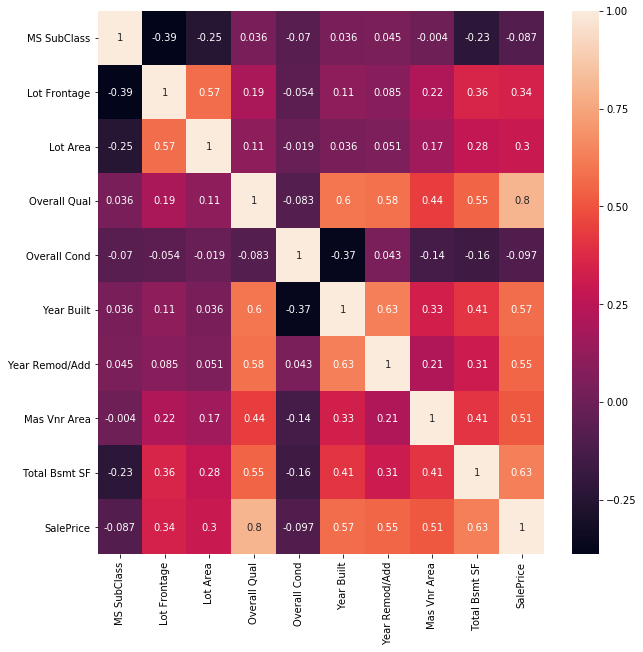

In [13]:
plt.figure(figsize=(10,10))
test_df = ames[['MS SubClass', 'MS Zoning', 'Lot Frontage', 
                    'Lot Area', 'Overall Qual', 'Overall Cond',
                'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF',  'SalePrice']]

sns.heatmap(test_df.corr(), annot=True)

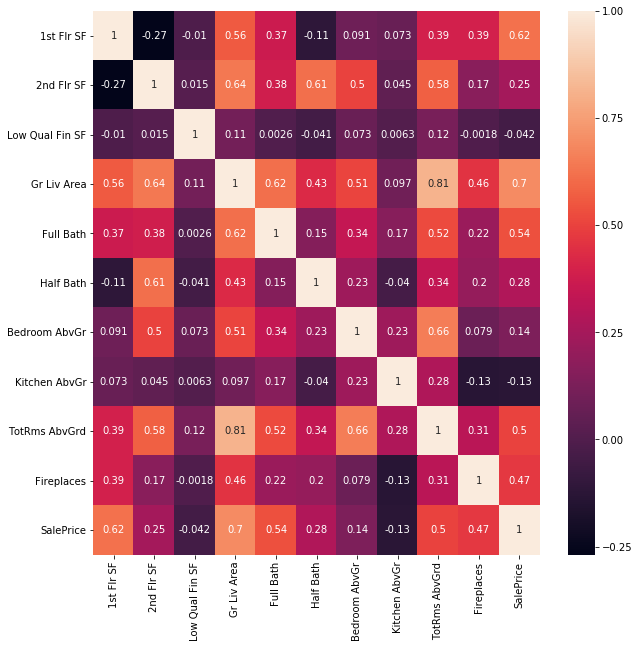

In [14]:
plt.figure(figsize=(10,10))
test_df2 = ames[['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
                    'Gr Liv Area', 'Full Bath', 'Half Bath',
                'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',  'SalePrice']]

sns.heatmap(test_df2.corr(), annot=True)

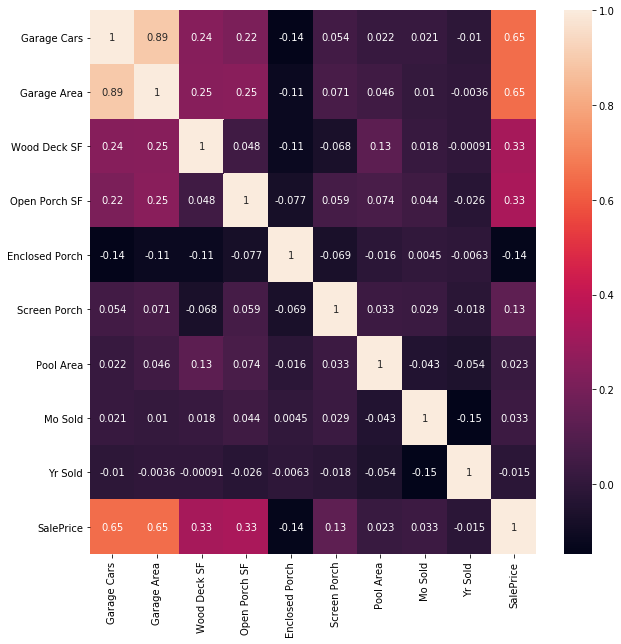

In [15]:
plt.figure(figsize=(10,10))
test_df3 = ames[['Garage Cars', 'Garage Area', 'Wood Deck SF', 
                    'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
                'Pool Area', 'Mo Sold', 'Yr Sold', 'SalePrice']]

sns.heatmap(test_df3.corr(), annot=True)

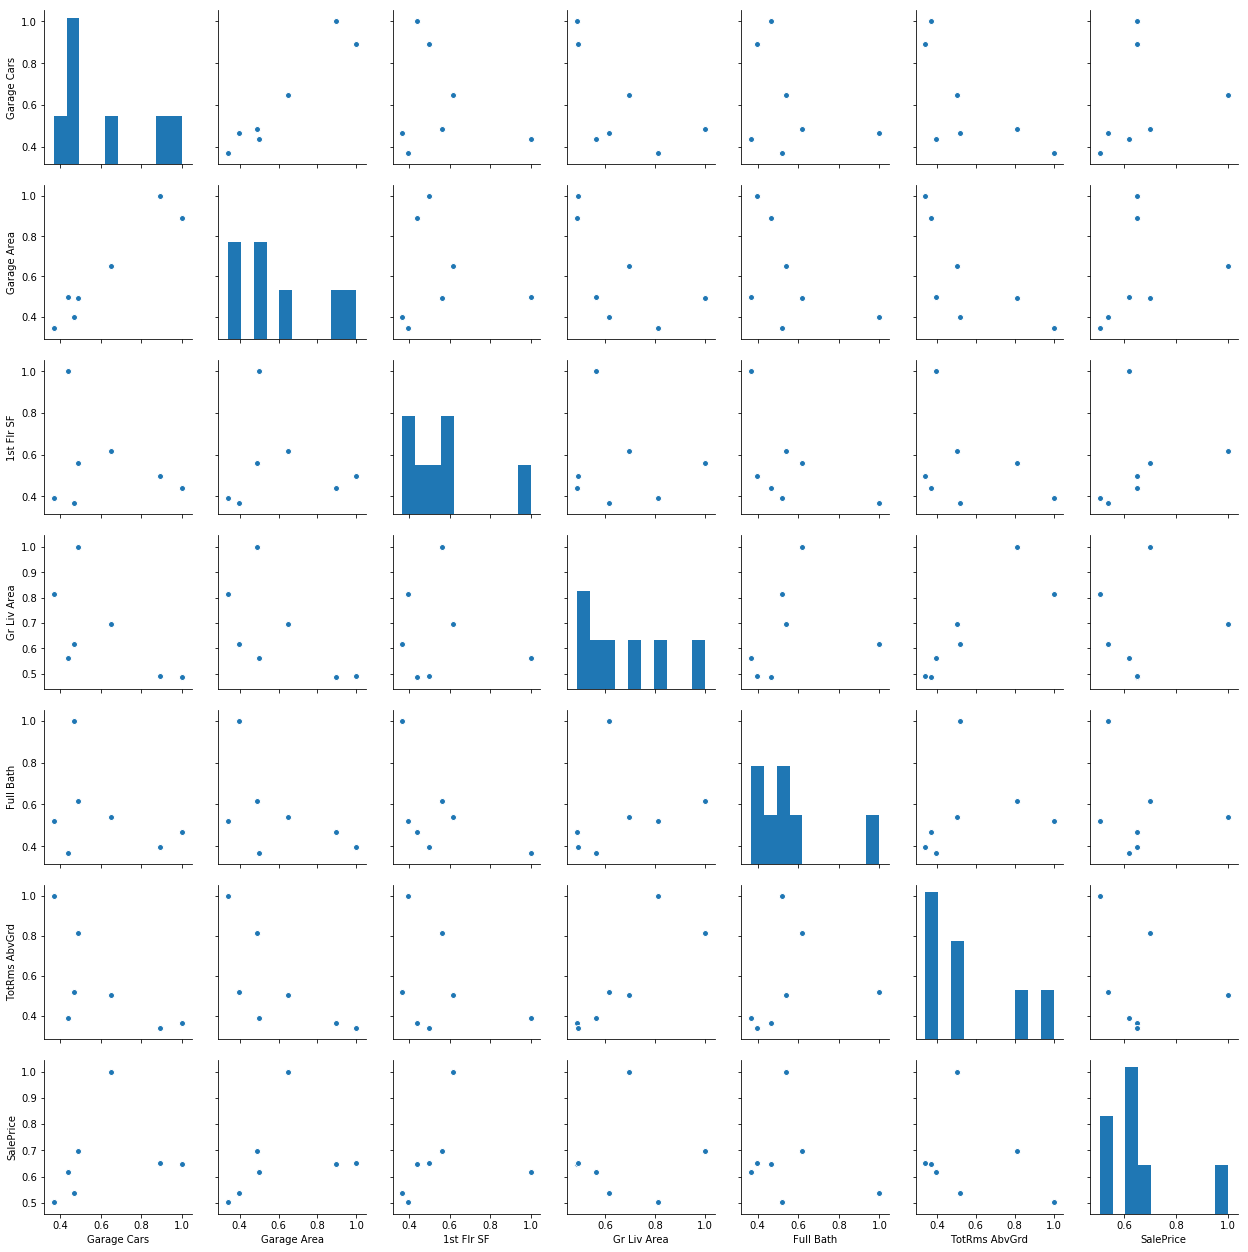

In [16]:
sns.pairplot(ames[['Garage Cars', 'Garage Area', '1st Flr SF', 'Gr Liv Area', 
                   'Full Bath', 'TotRms AbvGrd', 'SalePrice']].corr())

In [17]:
abs(ames.corr()['SalePrice']).sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
PID                0.255052
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Enclosed Porch     0.135656
Screen Porch       0.134581
Kitchen AbvGr      0.125444
Overall Cond       0.097019
MS SubClass        0.087335
Id                 0.051398
3Ssn Porch         0.048732
Bsmt Half Bath     0.045328
Low Qual Fin SF    0.041594
Mo Sold            0.032735
Pool Area          0

In [18]:
#From EDA I was able to conclude that the following variables all have more than
#a .5 R2 so are most correlated to sale price:

#1st Flr SF, Gr Liv Area, Full Bath, TotRms AbvGrd, Fireplaces, Garage Cars, Garage Area,
#Overall Qual, Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF



### PREPROCESSING

Seperate numeric and categorical data

In [19]:
g = ames.columns.to_series().groupby(ames.dtypes).groups
d = {k.name: v for k, v in g.items()}
d

{'float64': Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
       dtype='object'),
 'int64': Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
        'SalePrice'],
       dtype='object'),
 'object': Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2n

In [20]:
ames_num = ames[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold' ]]

ames_cat = ames[['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
        'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
        'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
        'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
        'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
        'Sale Type', 'Sale Condition']]

In [21]:
X = ames_num[[col for col in ames_num.columns if col != 'SalePrice']]
y = ames.SalePrice

print(X.shape, y.shape)

(2051, 38) (2051,)


TTS

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1538, 38) (513, 38) (1538,) (513,)


In [23]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

Lot Frontage      254
Mas Vnr Area       16
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt      83
Garage Cars         1
Garage Area         1
dtype: int64

In [24]:
X_train.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,...,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1069,60.0,0.0,0.0,0.0,938.0,938.0,0.0,0.0,1999.0,2.0,...,1,188,30,0,0,0,0,0,8,2007
342,21.0,604.0,358.0,0.0,125.0,483.0,0.0,0.0,1971.0,1.0,...,0,0,0,0,0,0,0,0,8,2008
1430,NaN,NaN,0.0,0.0,952.0,952.0,0.0,0.0,2002.0,2.0,...,1,144,112,0,0,0,0,0,4,2008
1790,67.0,110.0,788.0,0.0,785.0,1573.0,1.0,0.0,2002.0,2.0,...,0,0,72,0,0,0,0,0,3,2009
1999,56.0,0.0,259.0,0.0,667.0,926.0,0.0,0.0,1979.0,2.0,...,0,128,103,0,0,0,0,0,11,2007


In [25]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

X_train = imputer.fit_transform(X_train)

In [26]:
X_train

array([[   60.,     0.,     0., ...,     0.,     8.,  2007.],
       [   21.,   604.,   358., ...,     0.,     8.,  2008.],
       [   69.,     0.,     0., ...,     0.,     4.,  2008.],
       ..., 
       [   42.,     0.,   964., ...,     0.,     9.,  2008.],
       [   70.,     0.,     0., ...,     0.,     5.,  2006.],
       [   24.,     0.,   320., ...,     0.,     7.,  2009.]])

In [27]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)

X_train

array([[-0.43563453, -0.57363925, -0.98605292, ..., -0.08844523,
         0.63779247, -0.5616667 ],
       [-2.28425359,  2.94923024, -0.1804203 , ..., -0.08844523,
         0.63779247,  0.19809001],
       [-0.00903013, -0.57363925, -0.98605292, ..., -0.08844523,
        -0.8339627 ,  0.19809001],
       ..., 
       [-1.28884333, -0.57363925,  1.18330418, ..., -0.08844523,
         1.00573127,  0.19809001],
       [ 0.03837036, -0.57363925, -0.98605292, ..., -0.08844523,
        -0.46602391, -1.32142341],
       [-2.14205212, -0.57363925, -0.26593438, ..., -0.08844523,
         0.26985368,  0.95784672]])

In [28]:
X_train = pd.DataFrame(X_train, columns=X.columns)


Regularization - Lasso

In [29]:

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [30]:
lasso = Lasso(alpha=500)
lasso.fit(X_train, y_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
lasso.coef_

array([  2507.71597673,   3689.94186181,   7782.65507257,      0.        ,
           -0.        ,   8992.15600012,   1014.13372305,  -1105.61996626,
         3159.29024495,      0.        ,   5536.45804109,      0.        ,
         -822.42648073,  -3624.71948031,   5172.12220143,  23654.54719531,
         3954.29204765,   7447.74613676,   4696.4625726 ,      0.        ,
            0.        ,  -1226.55960057,  25140.00905814,      0.        ,
            0.        ,  -5875.4280872 ,  -1579.42534826,   4624.59784173,
         2972.92926398,   1709.7055388 ,    156.53085849,    748.41903818,
            0.        ,   3718.6230931 ,     -0.        ,  -8962.71969609,
          440.571108  ,     -0.        ])

In [32]:
for i, col in enumerate(X.columns):
    print(col, lasso.coef_[i])

Lot Frontage 2507.71597673
Mas Vnr Area 3689.94186181
BsmtFin SF 1 7782.65507257
BsmtFin SF 2 0.0
Bsmt Unf SF -0.0
Total Bsmt SF 8992.15600012
Bsmt Full Bath 1014.13372305
Bsmt Half Bath -1105.61996626
Garage Yr Blt 3159.29024495
Garage Cars 0.0
Garage Area 5536.45804109
Id 0.0
PID -822.426480735
MS SubClass -3624.71948031
Lot Area 5172.12220143
Overall Qual 23654.5471953
Overall Cond 3954.29204765
Year Built 7447.74613676
Year Remod/Add 4696.4625726
1st Flr SF 0.0
2nd Flr SF 0.0
Low Qual Fin SF -1226.55960057
Gr Liv Area 25140.0090581
Full Bath 0.0
Half Bath 0.0
Bedroom AbvGr -5875.4280872
Kitchen AbvGr -1579.42534826
TotRms AbvGrd 4624.59784173
Fireplaces 2972.92926398
Wood Deck SF 1709.7055388
Open Porch SF 156.530858492
Enclosed Porch 748.419038182
3Ssn Porch 0.0
Screen Porch 3718.6230931
Pool Area -0.0
Misc Val -8962.71969609
Mo Sold 440.571107999
Yr Sold -0.0


In [33]:
selected_x = []
for i, col in enumerate(X.columns):
    if abs(lasso.coef_[i]) > 0:
        selected_x.append(col)
        
selected_x = X_train[selected_x]

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('All features')
scores = cross_val_score(lr, X_train, y_train, cv=10)
print(scores, '\n', 'Mean: ', scores.mean())


print('Selected features')
scores = cross_val_score(lr, selected_x , y_train, cv=10)
print(scores, '\n', 'Mean: ', scores.mean())



All features
[ 0.85018446  0.77301859  0.86183198  0.86189892  0.8417622   0.88288272
  0.85401757  0.8145969   0.57230709  0.81746927] 
 Mean:  0.812996968644
Selected features
[ 0.85504047  0.77259312  0.86581818  0.86399965  0.84176314  0.88441955
  0.85405058  0.81594663  0.57795468  0.83025823] 
 Mean:  0.816184421739


Gridsearch

In [35]:
lasso = Lasso()
params_grid = {
    'fit_intercept': [True, False],
    'alpha': np.linspace(0.01, 100, 10),
    'normalize': [True, False],
    'precompute':[True, False]
}

In [36]:
grid_search = GridSearchCV(lasso, params_grid, verbose=2, n_jobs=-1, cv=3)

In [37]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=True .
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=True .
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=True .
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=False, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=False, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=False, total=   0.2s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=False 
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=True 
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=False 
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=False, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=False, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=True 
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=True, total=   0.0s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=False, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=False 
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=True, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=True 
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normaliz

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=True, total=   0.1s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=False 
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=True 
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=False 
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=False, total=   0.2s
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, norm

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=False, total=   0.2s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=True 
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=False, total=   0.2s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=True, total=   0.1s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=True, total=   0.1s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=False, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=True, total=   0.1s
[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=False 
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=False, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=True, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, n

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s


[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=True, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=False, total=   0.2s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=True 
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=Fals

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=False 
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=False, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=True 
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=True, total=   0.1s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=33.34, fit_intercept=Fa

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=44.45, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=False 
[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=44.45, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV]  alpha=44.45, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=False 
[CV] alpha=44.45, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=44.45, fit_intercept=True, norma

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=44.45, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=False 
[CV] alpha=44.45, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=True, total=   0.1s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=False, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=44.45, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=44.45, fit_intercept=Fal

[CV] alpha=66.67, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=66.67, fit_intercept=False, normalize=True, precompute=True, total=   0.1s
[CV] alpha=66.67, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=66.67, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=66.67, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=66.67, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=66.67, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=66.67, fit_intercept=False, normalize=True, precompute=False, total=   0.0s
[CV] alpha=66.67, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=66.67, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=66.67, fit_intercept=False, normalize=False, precompute=True, total=   0.1s
[CV] alpha=66.67, fit_intercept=Fals

[CV]  alpha=88.89, fit_intercept=False, normalize=False, precompute=True, total=   0.1s
[CV] alpha=88.89, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=88.89, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=100.0, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=88.89, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=100.0, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=88.89, fit_intercept=False, normalize=False, precompute=False, total=   0.0s
[CV]  alpha=88.89, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV]  alpha=100.0, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, normalize=True, precompute=False 
[CV] alpha=100.0, fit_in

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  1.00000e-02,   1.11200e+01,   2.22300e+01,   3.33400e+01,
         4.44500e+01,   5.55600e+01,   6.66700e+01,   7.77800e+01,
         8.88900e+01,   1.00000e+02]), 'normalize': [True, False], 'precompute': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [38]:
grid_search.best_score_ , grid_search.best_params_

(0.82205855231443625,
 {'alpha': 44.449999999999996,
  'fit_intercept': True,
  'normalize': True,
  'precompute': True})

In [39]:
best_estimator = grid_search.best_estimator_

print(best_estimator.score(X_train, y_train))

0.846638209759


Now test model using test data set

In [40]:
#Must impute and standardize X_test

In [41]:
X_test = imputer.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [42]:
ss = StandardScaler()
ss.fit(X_test)
X_test = ss.transform(X_test)

In [43]:
X_test = pd.DataFrame(X_test, columns=X.columns)

In [44]:
print('Training Score:', best_estimator.score(X_train, y_train))

print('Testing Score: ', best_estimator.score(X_test, y_test))

Training Score: 0.846638209759
Testing Score:  0.75149616841


Predicting

In [45]:
ames_test.shape

(879, 80)

In [46]:
ames_test.isnull().sum()[ames_test.isnull().sum()> 0]

Lot Frontage      160
Alley             821
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           875
Fence             707
Misc Feature      838
dtype: int64

In [47]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [48]:
g = ames_test.columns.to_series().groupby(ames.dtypes).groups
d = {k.name: v for k, v in g.items()}
d

{'float64': Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
       dtype='object'),
 'int64': Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
       dtype='object'),
 'object': Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', '

In [49]:
ames_test_num = ames_test[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']]

In [50]:
ames_test_num.shape

(879, 38)

In [53]:
ames_test_ss = imputer.transform(ames_test_num)
ames_test_ss = pd.DataFrame(ames_test_ss)

In [56]:
ss = StandardScaler()
ss.fit(ames_test_ss)
ames_test_ss = ss.transform(ames_test_ss)

In [57]:
ames_test_num.shape

(879, 38)

In [58]:
ames_test_ss = pd.DataFrame(ames_test_ss, columns=ames_test_num.columns)

In [59]:
selected_x.columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Area',
       'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
       'Misc Val', 'Mo Sold'],
      dtype='object')

In [60]:
ames_test_ss[selected_x.columns].shape

(879, 27)

In [61]:
ames_test.shape

(879, 80)

In [62]:
y_hat = lr.predict(ames_test_ss)

In [63]:
y_hat.mean()

181516.68725617678

In [64]:
y_train.mean()

181516.68725617684

In [65]:
PRED = pd.DataFrame(y_hat, columns=['SalePrice'])

In [66]:
ID = ames_test[['Id']]

In [67]:
PRED.head()

,SalePrice
0,146656.985083
1,165739.447038
2,212729.557885
3,117174.116263
4,198123.567214


In [68]:
Prediction1 = pd.concat([ID, PRED], axis=1)

In [69]:
pwd

'/Users/jenelleverrochi/GA/PROJECTS/project-3'

In [70]:
Prediction1.to_csv('predictions.csv', index=False)

In [71]:
X_train.shape

(1538, 38)

In [72]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=10, verbose=2)

In [73]:
rfe.fit(X_train, y_train)

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 fe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=2)

In [74]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True], dtype=bool)

In [75]:
rfe_list = []
for i, col in enumerate(X):
    if rfe.support_[i] == True:
        rfe_list.append(col)

In [76]:
X_train_rfe = X_train[rfe_list]
X_test_rfe = X_test[rfe_list]

In [77]:
lr.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
X_train_rfe.shape

(1538, 10)

In [79]:
lr.score(X_test_rfe, y_test)

0.74331390818144294

In [80]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
lr.score(X_test, y_test)

0.74101233240804965

In [82]:
X_test.shape

(513, 38)

In [83]:
y_test.shape

(513,)

In [84]:
selectkbest = SelectKBest(score_func=f_classif, k=20)

In [85]:
selectkbest.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_classif at 0x10e324ea0>)

In [86]:
selectkbest.get_support()

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True, False,  True,
        True,  True,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False, False], dtype=bool)

In [87]:
X_train.iloc[:,selectkbest.get_support()].head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Garage Yr Blt,Garage Cars,Garage Area,Overall Qual,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Open Porch SF,3Ssn Porch,Misc Val
0,-0.435635,-0.573639,-0.986053,0.834401,-0.258876,0.825464,0.282634,0.030851,-0.080579,0.915358,0.917560,-0.525592,2.383207,1.600589,2.555254,0.354707,0.637464,-0.264802,-0.104508,-0.088445
1,-2.284254,2.949230,-0.180420,-0.989277,-1.276295,-0.304400,-1.030633,-0.996456,-0.080579,-0.022006,-0.603445,-1.717658,0.410809,-1.031578,-1.033769,-0.918431,-0.931208,-0.708802,-0.104508,-0.088445
2,-0.009030,-0.573639,-0.986053,0.865805,-0.227571,0.946521,0.282634,-0.030410,0.623574,1.015790,0.870029,-0.538167,1.248725,0.623558,0.760742,0.354707,0.637464,0.948796,-0.104508,-0.088445
3,-0.103831,0.067943,0.787239,0.491200,1.161039,0.946521,0.282634,0.323021,0.623574,1.015790,0.870029,1.023590,-0.775454,0.144070,0.760742,-0.281862,-0.931208,0.356797,-0.104508,-0.088445
4,-0.625236,-0.573639,-0.403207,0.226508,-0.285709,0.018418,0.282634,-0.035123,-0.080579,-2.064121,0.299652,-0.440086,0.775632,0.298549,0.760742,-0.281862,-0.931208,0.815596,-0.104508,-0.088445


In [88]:
selected_xs = selectkbest.transform(X_train)
print(X_train.shape, selected_xs.shape)

(1538, 38) (1538, 20)


In [89]:
print('All features')
scores = cross_val_score(lr, X_train, y_train)
print(scores, '\n', 'Mean: ', scores.mean(),'\n')

print('Feature Selection via SelectKBest')
scores = cross_val_score(lr, selected_xs, y_train)
print(scores, '\n', 'Mean: ', scores.mean())

All features
[ 0.83717986  0.86280499  0.70323338] 
 Mean:  0.801072744617 

Feature Selection via SelectKBest
[ 0.83247717  0.84420291  0.7432368 ] 
 Mean:  0.806638960754


In [90]:
selected_xs_test = selectkbest.transform(X_test)
print(X_test.shape, selected_xs.shape)

(513, 38) (1538, 20)


In [91]:
print('All features')
scores = cross_val_score(lr, X_test, y_test)
print(scores, '\n', 'Mean: ', scores.mean(),'\n')

print('Feature Selection via SelectKBest')
scores = cross_val_score(lr, selected_xs_test, y_test)
print(scores, '\n', 'Mean: ', scores.mean())

All features
[ 0.8875689   0.51568547  0.50900988] 
 Mean:  0.637421418795 

Feature Selection via SelectKBest
[ 0.8312896   0.49634544  0.75189039] 
 Mean:  0.693175143084


In [92]:
selected_xs.shape

(1538, 20)

In [93]:
lr.fit(selected_xs, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
lr.score(selected_xs_test, y_test)

0.72699514386848596

In [95]:
ames_test_ss.shape

(879, 38)

In [96]:
selected_amestest = selectkbest.transform(ames_test_ss)
print(ames_test_ss.shape, selected_amestest.shape)

(879, 38) (879, 20)


In [97]:
PRED2 = pd.DataFrame(lr.predict(selected_amestest), columns=['SalePrice'])

In [98]:
Prediction2 = pd.concat((ID, PRED2), axis=1)

In [99]:
Prediction2.to_csv('prediction_lr2', index=False)

In [100]:
en = ElasticNet(alpha=.1,l1_ratio=.9)
params_grid = {
    'fit_intercept': [True, False],
    'alpha': np.linspace(0.01, 100, 10),
    'l1_ratio': np.linspace(0.01, 0.99, 10)
}

In [101]:
en.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
en.score(X_test, y_test)

0.73807206654516078

In [103]:
PRED4 = pd.DataFrame(en.predict(ames_test_ss), columns=['SalePrice'])

In [104]:
Prediction4 = pd.concat((ID, PRED4), axis=1)

In [105]:
Prediction4.to_csv('prediction_lr4.csv', index=False)

In [106]:
grid_search = GridSearchCV(en, params_grid, verbose=2, n_jobs=-1)

In [107]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.01 ...................
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.01 ...................
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.01 ...................
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889 .........
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.01, total=   0.1s
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.01, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889 .........
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889, total=   0.1s
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.01, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.227777777778 .........
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.227777777778 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889, total=   0.1s
[C

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.336666666667, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444 .........
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.336666666667, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333, total=   0.2s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111 .........
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.99 ...................
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.01 ..................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.99 ...................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.99, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.99 ...................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.01, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.01 ..................
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.01 ..................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.99, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889 ........
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.99, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778 ........
[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.01, total=   0.2s
[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.01, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889 ........
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889, total=   0.1s
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778, total=   0.2s
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778 ........
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333, total=   0.2s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.99 ..................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222, total=   0.2s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.01 ..................
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.01 ..................
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.99 ..................
[CV] ... alpha=11.12, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV] ... alpha=11.12, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.01 ..................
[CV] ... alpha=11.12, fit_intercept=True, l1_ratio=0.01, total=   0.0s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.99, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.99 ..................
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.99, total=   0.1s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.445555555556 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.99, total=   0.1s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.663333333333 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.663333333333 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.663333333333, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.663333333333 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=11.12, fit_intercept=Tru

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s


[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.663333333333, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.663333333333, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.772222222222 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.881111111111 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.881111111111 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.99 ..................
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.881111111111, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.881111111111 ........
[CV] alpha=11.12, fit_intercept=False, l1_ratio=0.01 .................
[CV] .. alpha=11.12, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV] alpha=11.12, fit_intercept=Fal

[CV] alpha=22.23, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV] .. alpha=22.23, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.118888888889 .......
[CV]  alpha=22.23, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV]  alpha=22.23, fit_intercept=False, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, l1_ratio=0.881111111111 ........
[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.445555555556 .......
[CV]  alpha=22.23, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV]  alpha=22.23, fit_intercept=False, l1_ratio=0.118888888889, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.118888888889 .......
[CV]  alpha=22.23, fit_intercept=False, l1_ratio=0.445555555556, total=   0.0s
[CV]  alpha=22.23, fit_intercept=False, l1_ratio=0.118888888889, total=   0.0s
[CV] alpha=22.23, fit_intercept

[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.99 ..................
[CV] .. alpha=22.23, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.99 .................
[CV]  alpha=33.34, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV] ... alpha=33.34, fit_intercept=True, l1_ratio=0.99, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.99 ..................
[CV]  alpha=33.34, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV] .. alpha=22.23, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV]  alpha=33.34, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.99 .................
[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.3366666

[CV] .. alpha=33.34, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, l1_ratio=0.01 ..................
[CV]  alpha=33.34, fit_intercept=False, l1_ratio=0.772222222222, total=   0.0s
[CV]  alpha=33.34, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, l1_ratio=0.772222222222 ........
[CV] alpha=44.45, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV]  alpha=44.45, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV] ... alpha=44.45, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, l1_ratio=0.01 ..................
[CV]  alpha=44.45, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV] alpha=44.45, fit_intercept=False, l1_ratio=0.01 .................
[CV]  alpha=44.45, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, l1

[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV] .. alpha=44.45, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, l1_ratio=0.99 .................
[CV]  alpha=55.56, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s
[CV] .. alpha=44.45, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV] alpha=44.45, fit_intercept=False, l1_ratio=0.99 .................
[CV]  alpha=55.56, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV]  alpha=55.56, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV]  alpha=55.56, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.881111111111 ........
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV]  alpha=55.56, fit_intercept=True, l1_ratio=0

[CV]  alpha=66.67, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=66.67, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV] alpha=55.56, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV]  alpha=66.67, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV]  alpha=55.56, fit_intercept=False, l1_ratio=0.663333333333, total=   0.0s
[CV] .. alpha=55.56, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=66.67, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV] alpha=55.56, fit_intercept=False, l1_ratio=0.663333333333 .......
[CV] alpha=55.56, fit_intercept=False, l1_ratio=0.99 .................
[CV]  alpha=55.56, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=55.56, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV]  alpha=66.67, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=66.67, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV]  alpha=55.56, fit_intercept=False, 

[CV] .. alpha=66.67, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV] ... alpha=77.78, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, l1_ratio=0.772222222222 ........
[CV]  alpha=77.78, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV] alpha=77.78, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV]  alpha=66.67, fit_intercept=False, l1_ratio=0.881111111111, total=   0.0s
[CV] alpha=66.67, fit_intercept=False, l1_ratio=0.881111111111 .......
[CV]  alpha=77.78, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV]  alpha=77.78, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s
[CV]  alpha=77.78, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV] alpha=77.78, fit_intercept=True, l1_

[CV]  alpha=88.89, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s
[CV] alpha=88.89, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV]  alpha=88.89, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV]  alpha=77.78, fit_intercept=False, l1_ratio=0.881111111111, total=   0.0s
[CV] alpha=88.89, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV] alpha=77.78, fit_intercept=False, l1_ratio=0.881111111111 .......
[CV]  alpha=77.78, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=77.78, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV]  alpha=77.78, fit_intercept=False, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=77.78, fit_intercept=False, l1_ratio=0.554444444444 .......
[CV]  alpha=77.78, fit_intercept=False, l1_ratio=0.881111111111, total=   0.0s
[CV] alpha=77.78, fit_intercept=False, l1_ratio=0.99 .................
[CV]  alpha=88.89, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=88.89, fit_in

[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV] .. alpha=88.89, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.01 .................
[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.663333333333, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.772222222222, total=   0.0s
[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV] .. alpha=88.89, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=88.89, fit_intercept=False

[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.554444444444 .......
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.881111111111 .......
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.554444444444, total=   0.0s
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.554444444444 .......
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.227777777778 .......
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.881111111111, total=   0.0s
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.881111111111 .......
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.554444444444, total=   0.0s
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.554444444444 .......
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV]  alpha=100.0, fit_interc

[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  1.00000e-02,   1.11200e+01,   2.22300e+01,   3.33400e+01,
         4.44500e+01,   5.55600e+01,   6.66700e+01,   7.77800e+01,
         8.88900e+01,   1.00000e+02]), 'l1_ratio': array([ 0.01   ,  0.11889,  0.22778,  0.33667,  0.44556,  0.55444,
        0.66333,  0.77222,  0.88111,  0.99   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [108]:
print(grid_search.best_score_, grid_search.best_params_)

0.819819520999 {'alpha': 22.23, 'fit_intercept': True, 'l1_ratio': 0.98999999999999999}


In [109]:
best_estimator.fit(X_train, y_train)

Lasso(alpha=44.449999999999996, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=True,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
best_estimator = grid_search.best_estimator_

print(best_estimator.score(X_train, y_train))
print(best_estimator.score(X_test, y_test))

0.848599217393
0.754986620846


In [111]:
PRED3 = best_estimator.predict(ames_test_ss)

In [112]:
PRED3 = pd.DataFrame(PRED3, columns=['SalePrice'])

In [113]:
PRED3.head()

,SalePrice
0,132954.688678
1,175431.738524
2,211322.240987
3,118374.356680
4,206771.422105


In [144]:
vis = best_estimator.predict(X_train)

In [173]:
pd.DataFrame(vis).index

RangeIndex(start=0, stop=1538, step=1)

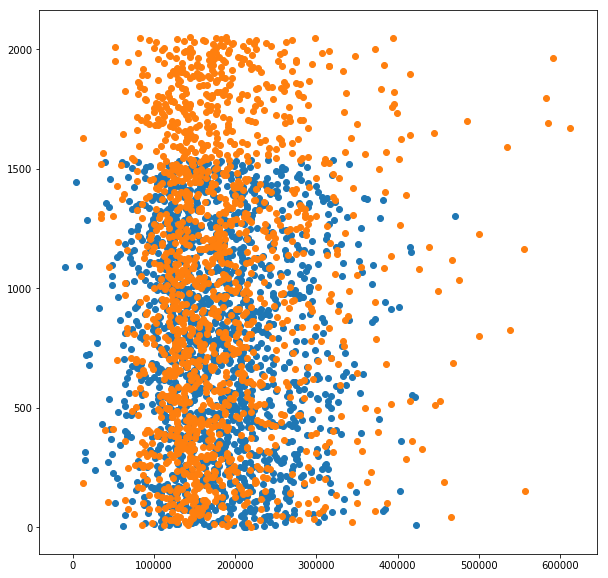

In [175]:
plt.figure(figsize=(10,10))
plt.scatter(vis, pd.DataFrame(vis).index)
plt.scatter(y_train, pd.DataFrame(y_train).index)

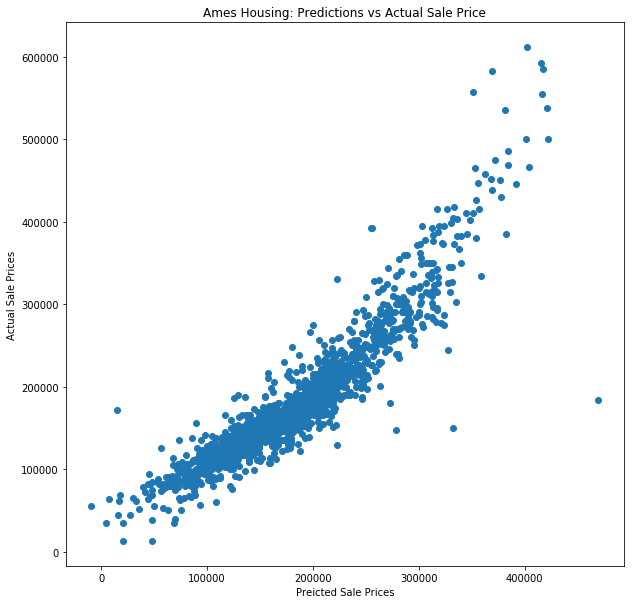

In [184]:
plt.figure(figsize=(10,10))
plt.scatter(vis, y_train)
plt.xlabel("Preicted Sale Prices")
plt.ylabel("Actual Sale Prices")
plt.title('Ames Housing: Predictions vs Actual Sale Price')

In [114]:
Prediction3= pd.concat((ID, PRED3), axis=1)

In [115]:
Prediction3.head()

,Id,SalePrice
0,2658,132954.688678
1,2718,175431.738524
2,2414,211322.240987
3,1989,118374.356680
4,625,206771.422105


In [116]:
Prediction3.to_csv('prediction_lr3.csv', index=False)

In [117]:
from sklearn.linear_model import Ridge

In [118]:
params = {
    'fit_intercept': [True, False],
    'alpha': np.linspace(100, 1000, 10),
    'normalize': [True, False]
}

In [119]:
np.linspace(100, 1000, 10)

array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.])

In [120]:
ridge = Ridge()
grid_search = GridSearchCV(ridge, params, verbose=1)

In [121]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [122]:
print(grid_search.best_score_, grid_search.best_params_)

0.81970344043 {'alpha': 200.0, 'fit_intercept': True, 'normalize': False}


In [123]:
best_estimator = grid_search.best_estimator_

print(best_estimator.score(X_train, y_train))
print(best_estimator.score(X_test, y_test))

0.852159701334
0.750684746819


In [124]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [125]:
grid_search.score(X_test, y_test)

0.75068474681890662

In [126]:
PRED6 = pd.DataFrame(grid_search.predict(ames_test_ss), columns=['SalePrice'])

In [127]:
Prediction6 = pd.concat((ID, PRED6), axis=1)

In [128]:
Prediction6.to_csv('prediction_lr6.csv', index=False)

In [129]:
PRED7= pd.DataFrame(best_estimator.predict(ames_test_ss), columns=['SalePrice'])

In [130]:
Predictions7 = pd.concat((ID, PRED7), axis=1)

In [131]:
Predictions7.head()

,Id,SalePrice
0,2658,135211.146439
1,2718,171490.174668
2,2414,211789.374931
3,1989,117134.822924
4,625,205178.282539


In [132]:
Predictions7.to_csv('prediction_lr7.csv', index=False)

In [133]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [134]:
ridge.score(X_train, y_train)

0.85557723973649513

In [135]:
ridge.score(X_test, y_test)

0.73666146647110908

In [136]:
PRED5 = pd.DataFrame(ridge.predict(ames_test_ss), columns=['SalePrice'])

In [137]:
Prediction5 = pd.concat((ID, PRED5), axis=1)

In [138]:
Prediction5.to_csv('predictions_lr5.csv', index=False)